In [1]:
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy
from skimage.measure import block_reduce
from utils import *

In [125]:

intensity_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/Lupine_22august/r_factor_0.34/rot_0' \
                 '/x_flip_0/y_flip_0/x_y_swap_0/256x256x120_intensity.npz'
pure_soil_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/pure_soil/43%wc_70x1x256x256_uint8.npy'
occ_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/Lupine_22august/r_factor_0.34/rot_0' \
                 '/x_flip_0/y_flip_0/x_y_swap_0/256x256x120_occupancy.npz'

intensity = np.load(intensity_path)['arr_0']
intensity = np.moveaxis(intensity, 2, 0)  # to (z,x,y)

occupancy = np.load(occ_path)['arr_0']
occupancy = np.moveaxis(occupancy, 2, 0)  # to (z,x,y)

pure_soil = np.squeeze(np.load(pure_soil_path))

min_dim = min(intensity.shape+pure_soil.shape)
print('min_dim:', min_dim)
print('intensity.shape:',intensity.shape)
print('pure_soil.shape:',pure_soil.shape)

cropped_soil = pure_soil[:min_dim, 50:min_dim+50, 50:min_dim+50]
cropped_intensity = intensity[20:min_dim+20, 50:min_dim+50, 50:min_dim+50]
cropped_occupancy = occupancy[20:min_dim+20, 50:min_dim+50, 50:min_dim+50]

# soil_scaling_factor = np.random.uniform(0.8, 1.2)
# print('soil_scaling_factor:',soil_scaling_factor)
# cropped_soil = (cropped_soil*soil_scaling_factor).astype(np.uint8)

# combine the intensity crop and the soil crop
combined_crop = np.zeros(cropped_soil.shape) + cropped_soil

### combined_crop[cropped_intensity > 0] = 0
combined_crop = combined_crop*(1-cropped_occupancy/255)
print(1-cropped_occupancy/255)

random_noise = np.random.randint(-25, high=25,
                                 size=cropped_intensity.shape)
noised_intensity = cropped_intensity + random_noise
noised_intensity = np.clip(noised_intensity, 0, 255)
noised_intensity[cropped_intensity == 0] = 0

root_scaling_factor = np.random.uniform(0.8, 1.2)
combined_crop += (noised_intensity*root_scaling_factor).astype(np.uint8)
print("root_scaling_factor:", root_scaling_factor)

# np.save('combined_pureSoil_and_rootIntensity_noised_scaled{}.npy'.format(soil_scaling_factor), combined_crop)




min_dim: 70
intensity.shape: (120, 256, 256)
pure_soil.shape: (70, 256, 256)
[[[1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  ...
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]]

 [[1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  ...
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]]

 [[1.         1.   

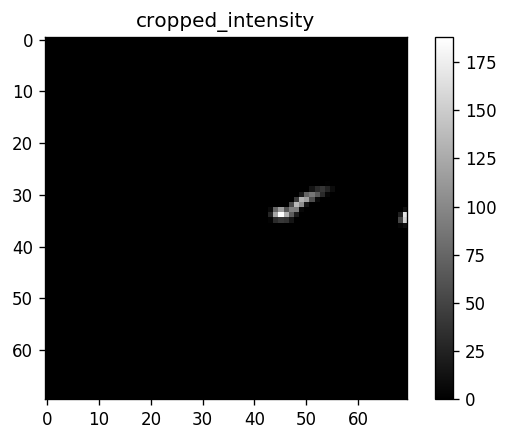

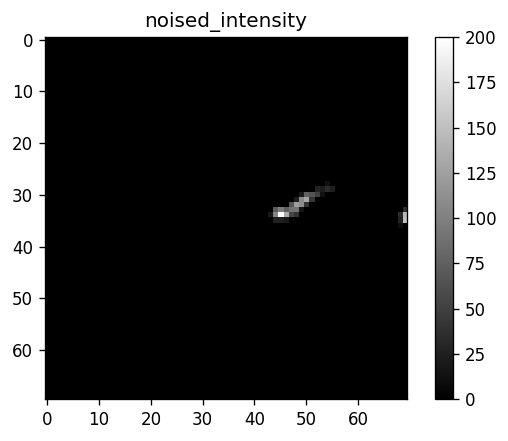

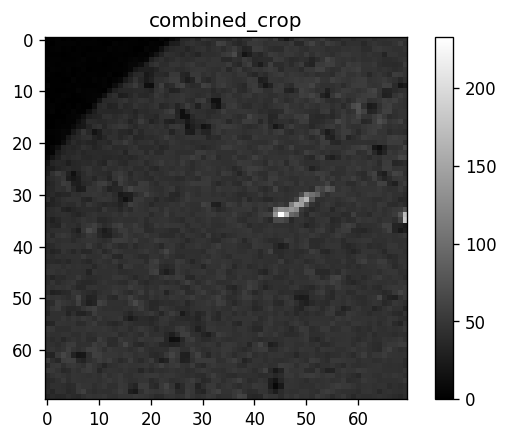

In [126]:
layer_idx = 60
plt.figure(dpi=120)
plt.imshow(cropped_intensity[layer_idx,:,:], cmap='gray')
plt.colorbar()
plt.title('cropped_intensity')

plt.figure(dpi=120)
plt.imshow(noised_intensity[layer_idx,:,:], cmap='gray')
plt.colorbar()
plt.title('noised_intensity')

plt.figure(dpi=120)
plt.imshow(combined_crop[layer_idx,:,:], cmap='gray')
plt.colorbar()
plt.title('combined_crop')
plt.show()

(128, 256, 256)
(120, 256, 256)
(189, 256, 256)
(198, 256, 256)
255
255
1.0
1.0


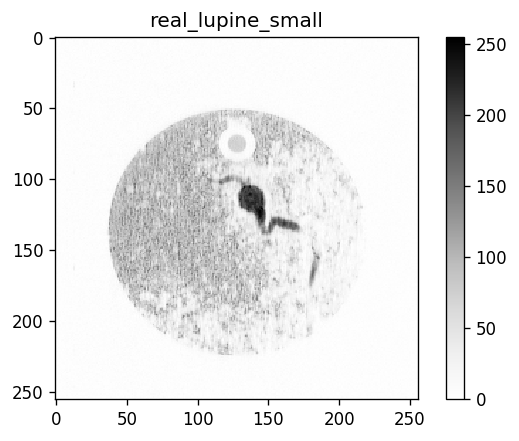

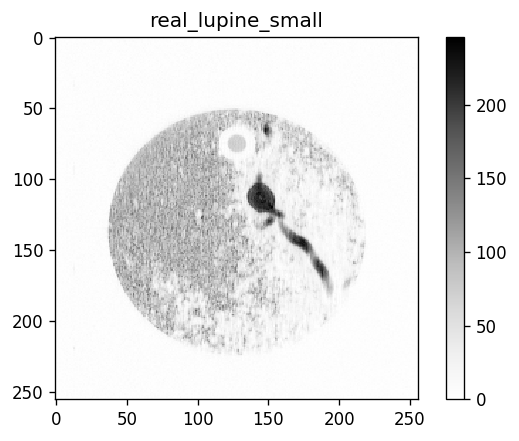

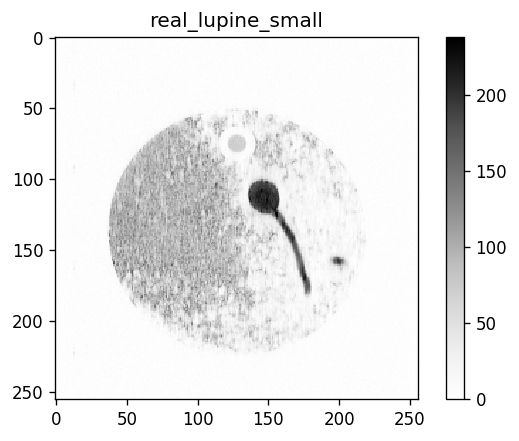

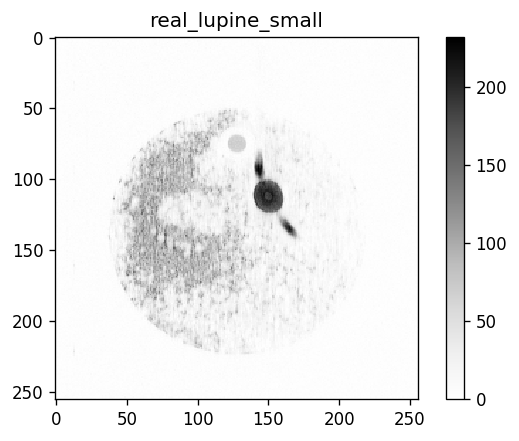

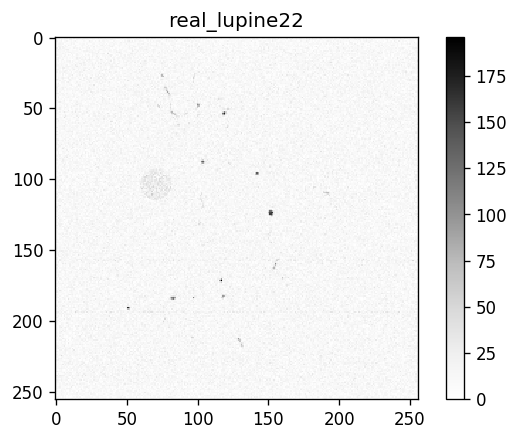

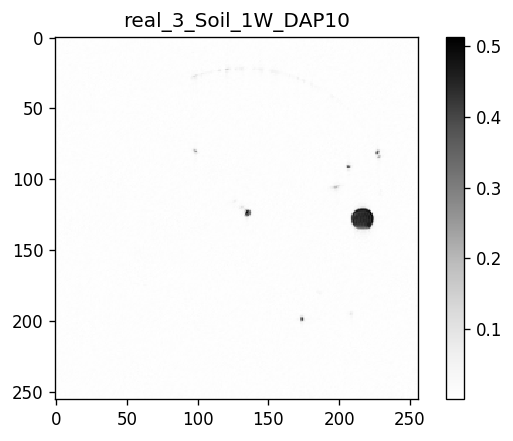

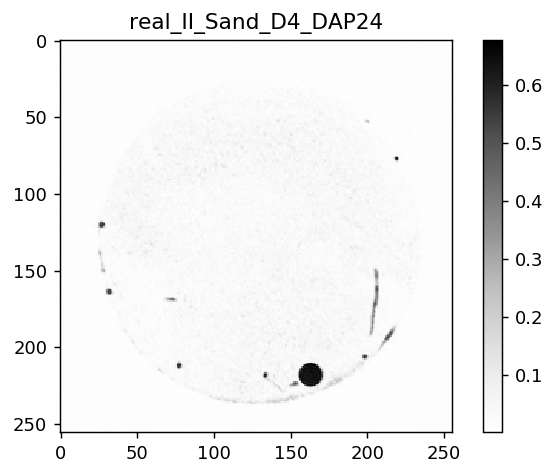

In [37]:
### Plot real images
real_lupine_small_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/lupine_small_xml/mri.npy'
real_lupine22_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/Lupine_22august/mri.npy'
real_3_Soil_1W_DAP10_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/3_Soil_1W_DAP10/mri.npy'
real_II_Sand_D4_DAP24_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/II_Sand_D4_DAP24/mri.npy'

real_lupine_small = np.load(real_lupine_small_path)
real_lupine_small = np.squeeze(real_lupine_small)
real_lupine22 = np.load(real_lupine22_path)
real_lupine22 = np.squeeze(real_lupine22)
real_3_Soil_1W_DAP10 = np.load(real_3_Soil_1W_DAP10_path)
real_II_Sand_D4_DAP24 = np.load(real_II_Sand_D4_DAP24_path)
real_II_Sand_D4_DAP24 = np.rollaxis(real_II_Sand_D4_DAP24, 2, 0)

print(real_lupine_small.shape)
print(real_lupine22.shape)
print(real_3_Soil_1W_DAP10.shape)
print(real_II_Sand_D4_DAP24.shape)

print(real_lupine_small.max())
print(real_lupine22.max())
print(real_3_Soil_1W_DAP10.max())
print(real_II_Sand_D4_DAP24.max())

plt.figure(dpi=120)
plt.imshow(real_lupine_small[70,:,:], cmap='Greys') #, vmin=0, vmax=255)
plt.colorbar()
plt.title('real_lupine_small')

plt.figure(dpi=120)
plt.imshow(real_lupine_small[75,:,:], cmap='Greys') #, vmin=0, vmax=255)
plt.colorbar()
plt.title('real_lupine_small')

plt.figure(dpi=120)
plt.imshow(real_lupine_small[80,:,:], cmap='Greys') #, vmin=0, vmax=255)
plt.colorbar()
plt.title('real_lupine_small')

plt.figure(dpi=120)
plt.imshow(real_lupine_small[85,:,:], cmap='Greys') #, vmin=0, vmax=255)
plt.colorbar()
plt.title('real_lupine_small')





plt.figure(dpi=120)
plt.imshow(real_lupine22[60,:,:], cmap='Greys') #, vmin=0, vmax=255)
plt.colorbar()
plt.title('real_lupine22')

plt.figure(dpi=120)
plt.imshow(real_3_Soil_1W_DAP10[90,:,:], cmap='Greys') #, vmin=0, vmax=1)
plt.colorbar()
plt.title('real_3_Soil_1W_DAP10')

plt.figure(dpi=130)
plt.imshow(real_II_Sand_D4_DAP24[100,:,:], cmap='Greys') #, vmin=0, vmax=1)
plt.colorbar()
plt.title('real_II_Sand_D4_DAP24')

plt.show()

In [32]:
### NEW plus root augmentation (aliasing effect)

intensity_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/lupine_small_xml/r_factor_0.71/rot_0' \
                 '/x_flip_0/y_flip_0/x_y_swap_0/256x256x128_intensity.npz'
occ_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/lupine_small_xml/r_factor_0.71/rot_0' \
                 '/x_flip_0/y_flip_0/x_y_swap_0/256x256x128_occupancy.npz'

# intensity_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/Lupine_22august/r_factor_0.34/rot_0' \
#                  '/x_flip_0/y_flip_0/x_y_swap_0/256x256x120_intensity.npz'
# occ_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/Lupine_22august/r_factor_0.34/rot_0' \
#                  '/x_flip_0/y_flip_0/x_y_swap_0/256x256x120_occupancy.npz'

# intensity_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/II_Sand_D4_DAP24/r_factor_1.73/rot_0' \
#                  '/x_flip_0/y_flip_0/x_y_swap_0/256x256x210_intensity.npz'
# occ_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/II_Sand_D4_DAP24/r_factor_1.73/rot_0' \
#                  '/x_flip_0/y_flip_0/x_y_swap_0/256x256x210_occupancy.npz'

# pure_soil_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/pure_soil/real_soil_noise/43%wc_70x1x256x256_uint8.npy'
# pure_soil_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/pure_soil/real_soil_noise/34%wc_70x1x256x256_uint8.npy'
pure_soil_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/pure_soil/virtual_soil_noise/300x300x300/d_0.npy'
# pure_soil_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/pure_soil/virtual_soil_noise/300x300x300/s_0.npy'
soil_noise_type = None
if soil_noise_type != 'g':
    soil_noise_type = pure_soil_path.split('/')[-1].split('_')[0]
print('soil_noise_type:', soil_noise_type)

intensity = np.load(intensity_path)['arr_0']  # (x,y,z)
intensity = np.moveaxis(intensity, 2, 0)  # to (z,x,y)

occupancy = np.load(occ_path)['arr_0']  # (x,y,z)
occupancy = np.moveaxis(occupancy, 2, 0)  # to (z,x,y)

if soil_noise_type != 'g':
    pure_soil = np.load(pure_soil_path)
    pure_soil = normalize_to(pure_soil, 0, 255)
    pure_soil = np.squeeze(pure_soil)
else:
    pure_soil = np.random.normal(25, scale=25, size=(150,300,300))
    pure_soil = normalize_to(pure_soil, 0, 255)
    
pure_soil = pure_soil.astype(np.float32)
# if soil_noise_type in ['h', 's']:
#     pure_soil *= 0.3
if pure_soil.shape[0] < 100:
    pure_soil = np.concatenate((pure_soil, deepcopy(pure_soil)), axis=0)


# min_dim = min(intensity.shape+pure_soil.shape)
# print('min_dim:', min_dim)
print('intensity.shape:',intensity.shape)
print('pure_soil.shape:',pure_soil.shape)

width, height, depth = 250, 250, 110# 100, 100, 70  # 250, 250, 110
start_x, start_y, start_z = 0,0,0# 50, 155, 50  # 0,0,0

cropped_soil = pure_soil[0:0+depth, 0:0+width, 0:0+height]  # [0:0+depth, 70:70+width, 70:70+height]
cropped_intensity = intensity[start_z:start_z+depth, start_x:start_x+width, start_y:start_y+height]
cropped_occupancy = occupancy[start_z:start_z+depth, start_x:start_x+width, start_y:start_y+height]

soil_scaling_factor = 0.9  #np.random.uniform(0.6, 1)
print('soil_scaling_factor:',soil_scaling_factor)
cropped_soil = (cropped_soil*soil_scaling_factor)



# add more augmentations: discontinuous slices: old version
# # dice = np.random.uniform()
# # if dice<0.5:  # 50% chance of making continuous slices
# thickness_disconnection = np.random.randint(2, high=5)  # the thickness can be either 2,3, or 4
# thickness_connected = np.random.randint(2, high=5)  # the thickness of connected part, can be 2,3,4
# z_coord = np.arange(noised_intensity.shape[0])
# mult_factor = np.random.uniform()  # multiply with random number in range (0,1)
# noised_intensity = noised_intensity.astype(np.float32)
# noised_intensity[z_coord % (thickness_disconnection+thickness_connected)
#                  < thickness_disconnection] *= mult_factor

# add more augmentations: discontinuous slices: new version
# thickness_disconnection = np.random.randint(2, high=5)  # the thickness can be either 2,3, or 4
# thickness_connected = np.random.randint(2, high=5)  # the thickness of connected part, can be 2,3,4
# z_coord = np.arange(cropped_occupancy.shape[0])
# cropped_occupancy[z_coord % (thickness_disconnection+thickness_connected)
#                  < thickness_disconnection] = 0

# combine the intensity crop and the soil crop
combined_crop = np.zeros(cropped_soil.shape) + cropped_soil

### combined_crop[cropped_intensity > 0] = 0
combined_crop = combined_crop*(1-cropped_occupancy/255)
# print(1-cropped_occupancy/255)

# adding random noise to root intensity
# random_noise = np.random.randint(-25, high=25,
#                                  size=cropped_intensity.shape)
random_noise = np.random.normal(0, scale=1, size=cropped_intensity.shape)
random_noise = normalize_to(random_noise, 0.8, 1.2)
cropped_intensity = cropped_intensity.astype(np.float32)
noised_intensity = cropped_intensity * random_noise
# noised_intensity = cropped_intensity + random_noise
noised_intensity = np.clip(noised_intensity, 0, 255)
noised_intensity[cropped_occupancy == 0] = 0

combined_crop += noised_intensity
# np.save('combined_pureSoil_and_rootIntensity_noised_scaled{}.npy'.format(soil_scaling_factor), combined_crop)




soil_noise_type: d
intensity.shape: (128, 256, 256)
pure_soil.shape: (300, 300, 300)
soil_scaling_factor: 0.9


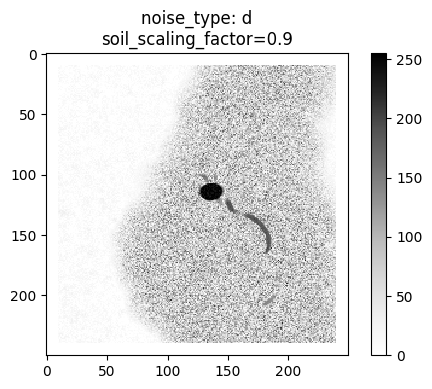

In [39]:
plt.figure(dpi=100)
combined_crop[:,:10,:] = 0
combined_crop[:,:,:10] = 0
combined_crop[:,-10:,:] = 0
combined_crop[:,:,-10:] = 0
plt.imshow(combined_crop[71,:,:], cmap='Greys')  #, vmin=0, vmax=255)
plt.colorbar()
plt.title('noise_type: {}\nsoil_scaling_factor={}'.format(soil_noise_type, soil_scaling_factor))
plt.show()

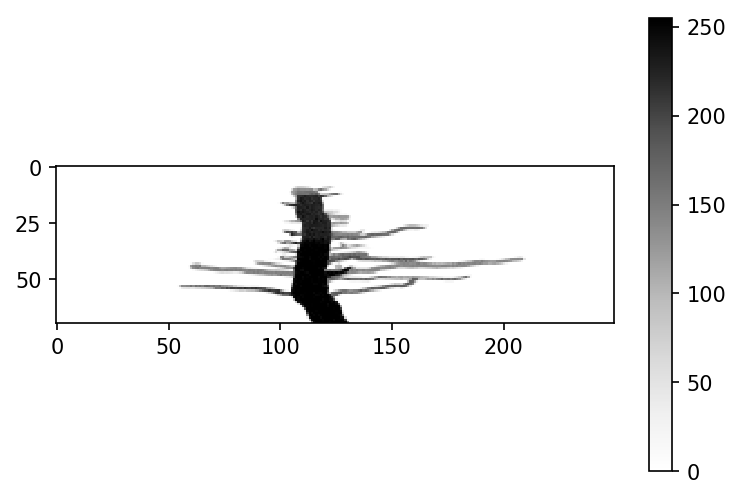

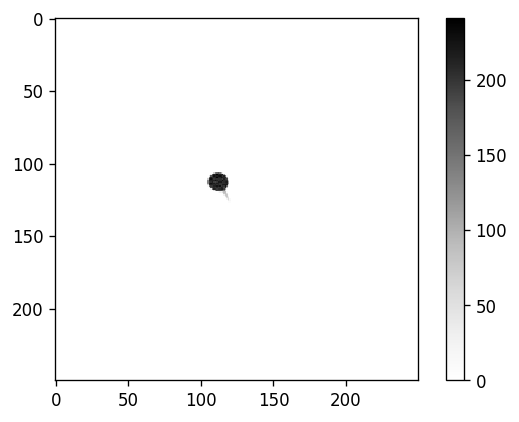

In [26]:
plot_merged_slices(noised_intensity, 'y', 0, 200)
plot_one_slice(noised_intensity, 'z', 20)

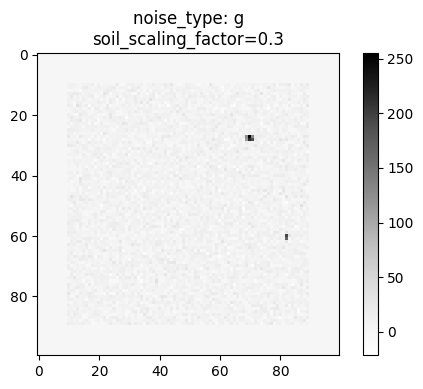

In [284]:
plt.figure(dpi=100)
combined_crop[:,:10,:] = 0
combined_crop[:,:,:10] = 0
combined_crop[:,-10:,:] = 0
combined_crop[:,:,-10:] = 0
plt.imshow(combined_crop[30,:,:], cmap='Greys')  #, vmin=0, vmax=255)
plt.colorbar()
plt.title('noise_type: {}\nsoil_scaling_factor={}'.format(soil_noise_type, soil_scaling_factor))
plt.show()

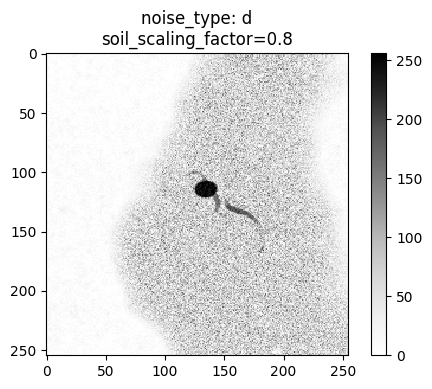

In [130]:
plt.figure(dpi=100)
plt.imshow(combined_crop[70,:,:], cmap='Greys')  #, vmin=0, vmax=255)
plt.colorbar()
plt.title('noise_type: {}\nsoil_scaling_factor={}'.format(soil_noise_type, soil_scaling_factor))
plt.show()

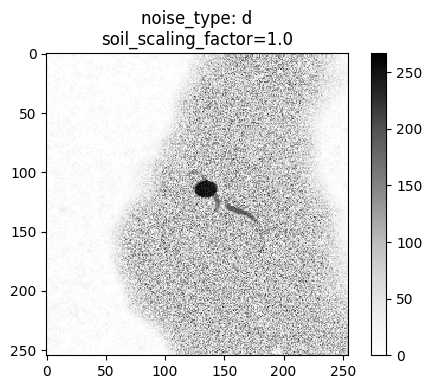

In [132]:
plt.figure(dpi=100)
plt.imshow(combined_crop[70,:,:], cmap='Greys')  #, vmin=0, vmax=255)
plt.colorbar()
plt.title('noise_type: {}\nsoil_scaling_factor={}'.format(soil_noise_type, soil_scaling_factor))
plt.show()

### apply gradient to soil image

255.0
0.0
1.0
0.7


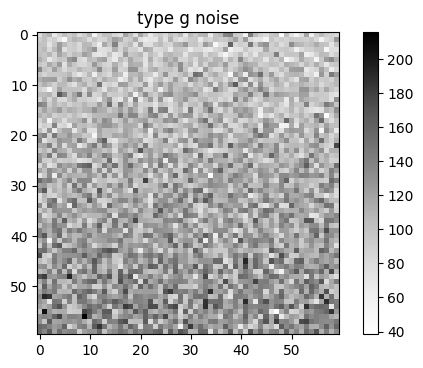

In [44]:
# 
pure_soil = np.random.normal(25, scale=25, size=(60,60,60))
pure_soil = normalize_to(pure_soil, 0, 255)
print(pure_soil.max())
print(pure_soil.min())

plt.figure(dpi=100)
gradient = np.arange(pure_soil.shape[0])
gradient = normalize_to(gradient, 0.7, 1)
print(gradient.max())
print(gradient.min())
gradient = np.expand_dims(np.expand_dims(gradient, 1), 2)
# gradient = np.expand_dims(gradient,2)
pure_soil *= gradient
plt.imshow(pure_soil[:,30,:], cmap='Greys')  #, vmin=0, vmax=255)
plt.colorbar()
plt.title('type g noise')
plt.show()

### imitate the aliasing effect

In [268]:
# high_res_intensity_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/lupine_small_xml/r_factor_1.00/rot_0/x_flip_0/y_flip_0/x_y_swap_0/512x512x256_intensity.npz'
high_res_intensity_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/Lupine_22august/r_factor_0.71/rot_0/x_flip_0/y_flip_0/x_y_swap_0/512x512x240_intensity.npz'
high_res_intensity = np.load(high_res_intensity_path)['arr_0']
high_res_intensity = np.rollaxis(high_res_intensity, 2, 0)
print(high_res_intensity.shape)

# high_res_occ_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/lupine_small_xml/r_factor_1.00/rot_0/x_flip_0/y_flip_0/x_y_swap_0/512x512x256_occupancy.npz'
high_res_occ_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/Lupine_22august/r_factor_0.71/rot_0/x_flip_0/y_flip_0/x_y_swap_0/512x512x240_occupancy.npz'
high_res_occ = np.load(high_res_occ_path)['arr_0']
high_res_occ = np.rollaxis(high_res_occ, 2, 0)
print(high_res_occ.shape)

# low_res_intensity_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/lupine_small_xml/r_factor_1.00/rot_0/x_flip_0/y_flip_0/x_y_swap_0/256x256x128_intensity.npz'
low_res_intensity_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/Lupine_22august/r_factor_0.71/rot_0/x_flip_0/y_flip_0/x_y_swap_0/256x256x120_intensity.npz'
low_res_intensity = np.load(low_res_intensity_path)['arr_0']
low_res_intensity = np.rollaxis(low_res_intensity, 2, 0)
print(low_res_intensity.shape)

# gt_x1_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/lupine_small_xml/r_factor_1.00/rot_0/x_flip_0/y_flip_0/x_y_swap_0/256x256x128/ground_truth.npy'
gt_x1_path = '/home/stud/zhaoy/local_dir/Real_MRI/manual-reconstructiontemp/Lupine_22august/r_factor_0.71/rot_0/x_flip_0/y_flip_0/x_y_swap_0/256x256x120/ground_truth.npy'
gt_x1 = np.load(gt_x1_path)
gt_x1 = np.squeeze(gt_x1)
print(gt_x1.shape)



(240, 512, 512)
(240, 512, 512)
(120, 256, 256)
(120, 256, 256)


In [269]:
z_compressed_intensity = high_res_intensity[::2,:,:]
flattened_intensity = block_reduce(z_compressed_intensity, block_size=(1,2,2), func=np.mean)
print(flattened_intensity.shape)

z_compressed_occ = high_res_occ[::2,:,:]
flattened_occ = block_reduce(z_compressed_occ, block_size=(1,2,2), func=np.mean)
print(flattened_occ.shape)

(120, 256, 256)
(120, 256, 256)


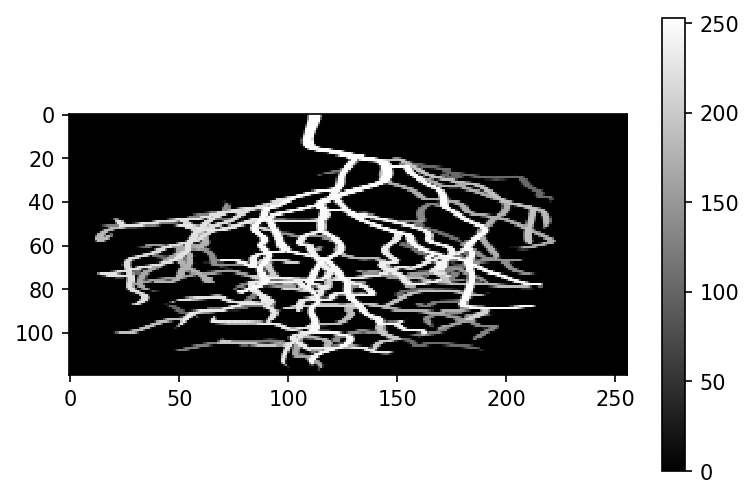

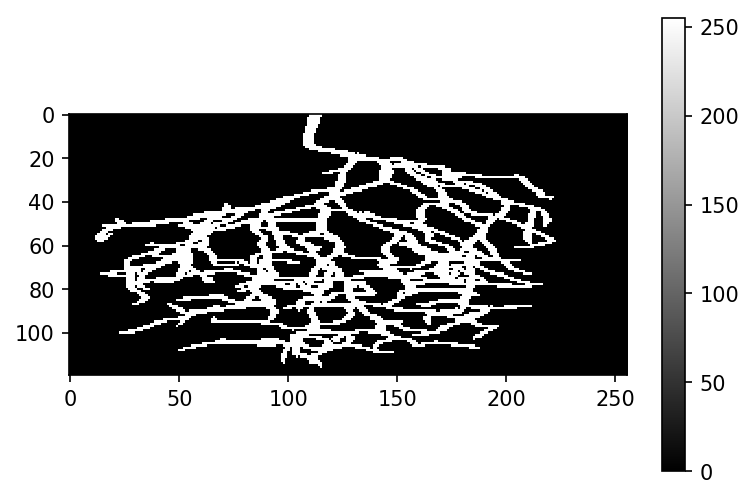

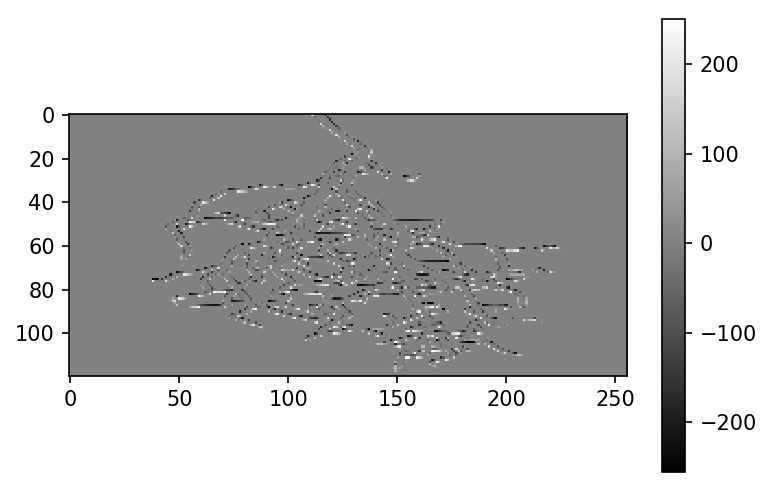

255


In [272]:
# plt.figure(dpi=150)
# plt.imshow(flattened_intensity[:,120,:], cmap='gray')
# plt.colorbar()
# plt.title('flattened_intensity')
# plt.show()

# plot_merged_slices(flattened_intensity, 'y', 0, 200)
plot_merged_slices(flattened_occ, 'y', 0, 200)
plot_merged_slices(gt_x1, 'y', 0, 200)
# plot_merged_slices((flattened_occ>0)*gt_x1.max()-gt_x1, 'y', 0, 200)

plt.figure(dpi=150)
to_show=np.max(flattened_occ[:,0:200,:], axis=1) - np.max(gt_x1[:,0:200,:], axis=1)
plt.imshow(to_show, cmap='gray')  # aspect=2
plt.colorbar()
plt.show()


print(gt_x1.max())

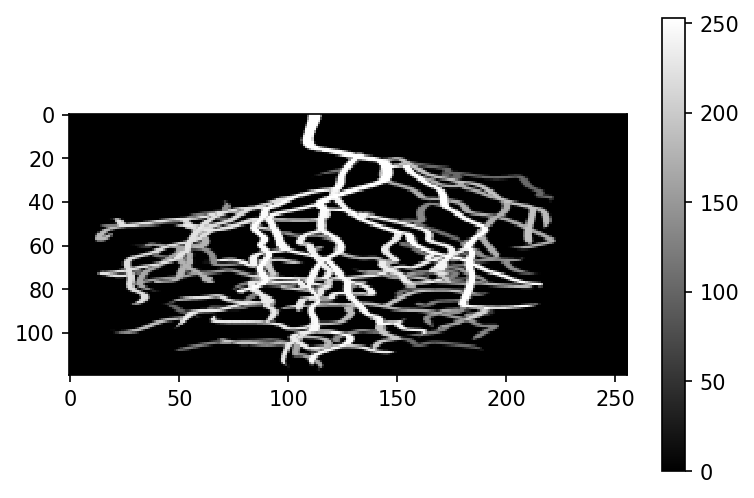

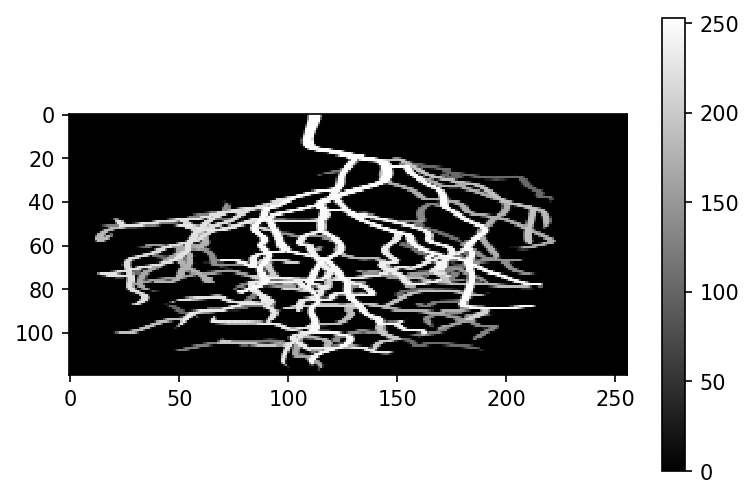

In [273]:
# plt.figure(dpi=120)
# plt.imshow(low_res_intensity[:,120,:], cmap='gray')
# plt.colorbar()
# plt.title('low_res_intensity')
# plt.show()

plot_merged_slices(low_res_intensity, 'y', 0, 200)
plot_merged_slices(flattened_intensity, 'y', 0, 200)


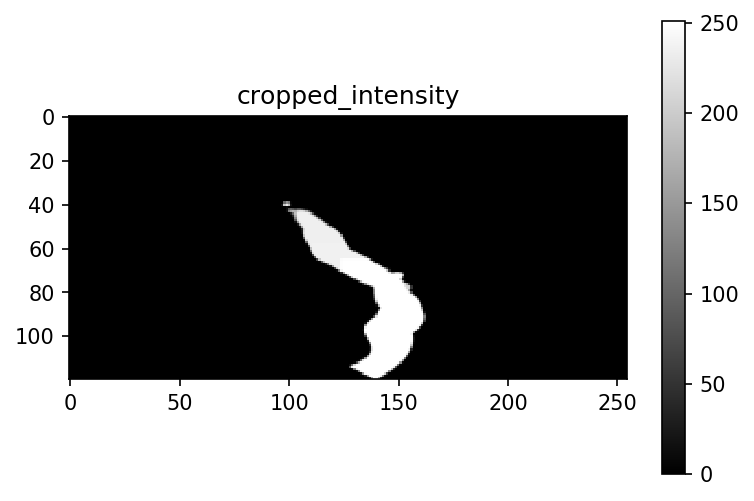

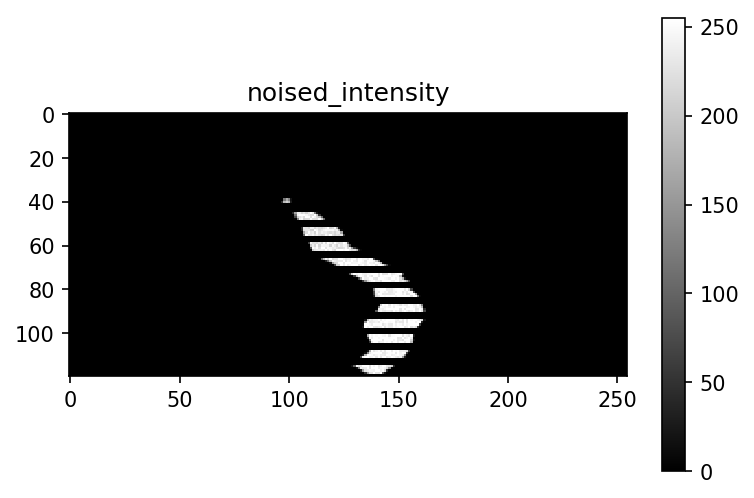

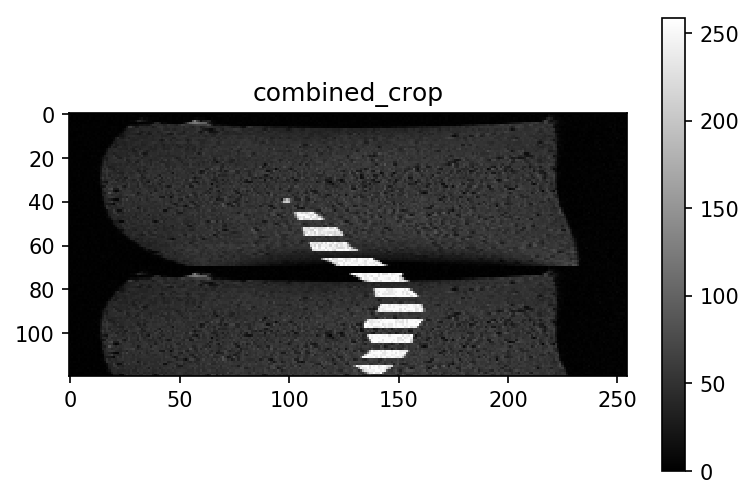

In [42]:
layer_idx = 120
plt.figure(dpi=150)
plt.imshow(cropped_intensity[:,layer_idx,:], cmap='gray')
plt.colorbar()
plt.title('cropped_intensity')

plt.figure(dpi=150)
plt.imshow(noised_intensity[:,layer_idx,:], cmap='gray')
plt.colorbar()
plt.title('noised_intensity')

plt.figure(dpi=150)
plt.imshow(combined_crop[:,layer_idx,:], cmap='gray')
plt.colorbar()
plt.title('combined_crop')
plt.show()

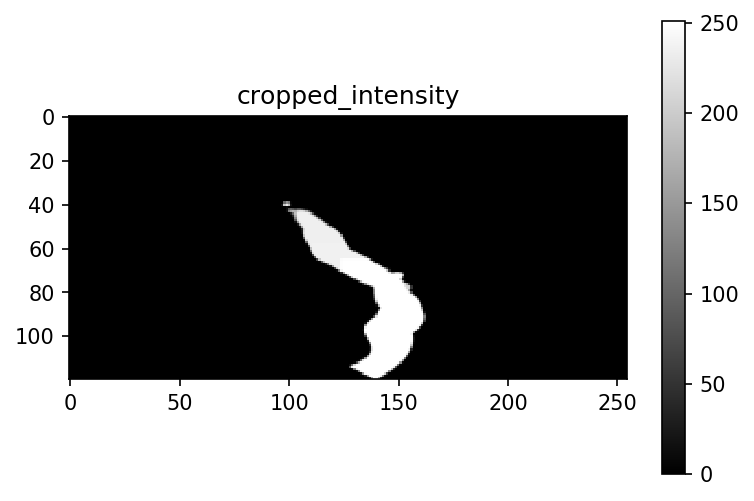

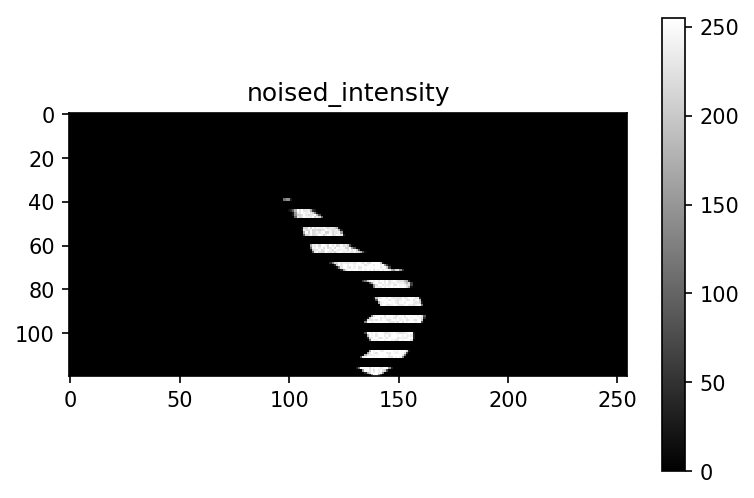

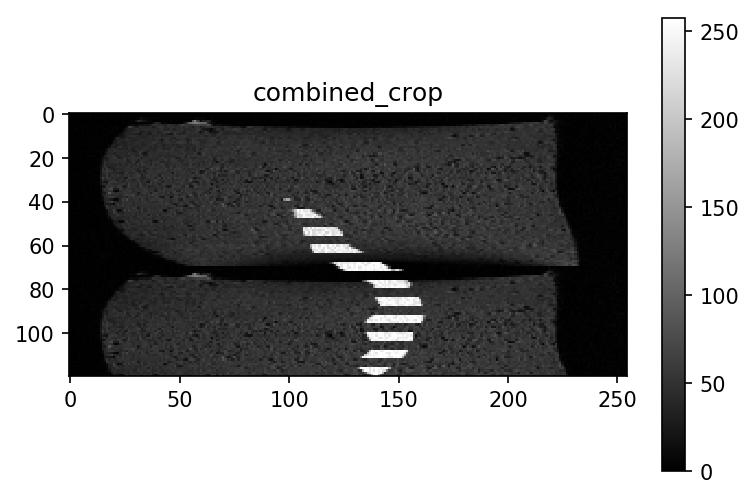

In [40]:
layer_idx = 120
plt.figure(dpi=150)
plt.imshow(cropped_intensity[:,layer_idx,:], cmap='gray')
plt.colorbar()
plt.title('cropped_intensity')

plt.figure(dpi=150)
plt.imshow(noised_intensity[:,layer_idx,:], cmap='gray')
plt.colorbar()
plt.title('noised_intensity')

plt.figure(dpi=150)
plt.imshow(combined_crop[:,layer_idx,:], cmap='gray')
plt.colorbar()
plt.title('combined_crop')
plt.show()

In [6]:
np.where(cropped_intensity==cropped_intensity.max())

(array([54]), array([52]), array([51]))

In [155]:
def combine_whole_intensity_with_soil(intensity, occupancy, pure_soil):
    # the shape should be in the order of (z, x, y)
    intensity_z, intensity_x,  intensity_y = intensity.shape
    soil_z, soil_x, soil_y = pure_soil.shape

    # match the shape of pure soil data to the intensity grid
    if intensity_x > soil_x:
        diff_x = intensity_x - soil_x
        pure_soil = np.pad(pure_soil, pad_width=((0,0), (diff_x//2, diff_x-diff_x//2), (0,0)))
    elif intensity_x < soil_x:
        diff_x = soil_x - intensity_x
        pure_soil = pure_soil[:, diff_x//2:-(diff_x-diff_x//2), :]

    if intensity_y > soil_y:
        diff_y = intensity_y - soil_y
        pure_soil = np.pad(pure_soil, pad_width=((0,0), (0,0), (diff_y//2, diff_y-diff_y//2)))
    elif intensity_y < soil_y:
        diff_y = soil_y - intensity_y
        pure_soil = pure_soil[:, :, diff_y//2:-(diff_y-diff_y//2)]

    if intensity_z > soil_z:
        # extend the z dimension of pure soil data by repeating z
        num_whole_repeats = intensity_z//soil_z
        depth_last_partial_repeat = intensity_z % soil_z
        if num_whole_repeats > 1:
            pure_soil = np.concatenate([pure_soil for _ in range(num_whole_repeats)], axis=0)
        if depth_last_partial_repeat > 0:
            pure_soil = np.concatenate((pure_soil, pure_soil[:depth_last_partial_repeat, :, :]), axis=0)
    elif intensity_z < soil_z:
        diff_z = soil_z - intensity_z
        pure_soil = pure_soil[diff_z//2:-(diff_z-diff_z//2), :, :]

    # debugging
    print('final intensity shape:', intensity.shape)
    print('final soil shape:', pure_soil.shape)

    # combine the intensity grid and the pure soil
    # randomly scale the soil crop
    soil_scaling_factor = np.random.uniform(0.9, 1.4)
    print('soil_scaling_factor:',soil_scaling_factor)
    pure_soil = (pure_soil * soil_scaling_factor).astype(np.uint8)

    # combine the intensity crop and the soil crop
    combined = np.zeros(pure_soil.shape) + pure_soil

    ### combined[intensity > 0] = 0
    combined = combined*(1-occupancy/255)

    random_noise = np.random.randint(-25, high=25,
                                     size=intensity.shape)
    noised_intensity = intensity + random_noise
    noised_intensity = np.clip(noised_intensity, 0, 255)  # clip in the range of uint8
    noised_intensity[intensity == 0] = 0
    
    combined += noised_intensity

#     root_scaling_factor = np.random.uniform(0.7, 0.7)
#     combined += (noised_intensity*root_scaling_factor).astype(np.uint8)
#     print('root_scaling_factor:',root_scaling_factor)

    return combined

def show_one_slice(image, slice_idx, title=None):
    plt.figure(dpi=120)
    plt.imshow(combined[slice_idx],cmap='gray')
    if title is not None:
        plt.title(title)
    plt.colorbar()
    plt.show()

In [156]:
combined = combine_whole_intensity_with_soil(intensity, occupancy, pure_soil)
print(combined.shape)

final intensity shape: (120, 256, 256)
final soil shape: (120, 256, 256)
soil_scaling_factor: 1.4
(120, 256, 256)


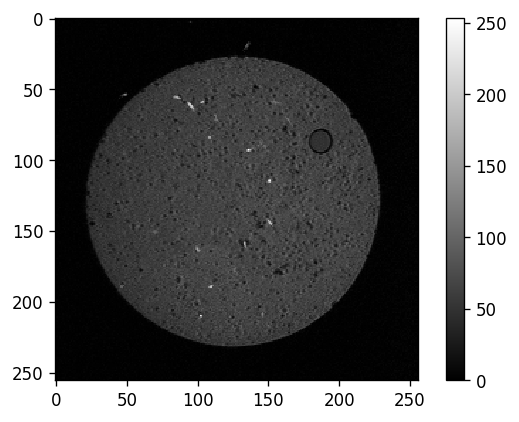

27.532559303333585


In [157]:
show_one_slice(combined, 52)
print(combined.mean())

In [131]:
combined.max()

181.05490196078432

In [132]:
intensity.max()


254